## Ахметкин Олег
### 21.Б06-пу

# 1. Решение нелинейного уравнения методом Ньютона

$
x \ln(x+1) - 0.3 = 0 \\
f(x) = x \ln(x+1) - 0.3 , x \in (-1, +\infty) \\
f^{'}(x) = \ln(x+1) + \frac{x}{x+1}
$

In [99]:
from math import log, sin, cos

In [3]:
def f(x):
    return x * log(x + 1) - 0.3

In [4]:
def df(x):
    return log(x + 1) + x / (x + 1)

In [100]:
def solve(f, df, x0, eps=1e-4):
    while True:
        x = x0 - f(x0) / df(x0)
        
        if abs(x - x0) < eps:
            return x
        
        x0 = x

In [101]:
starts = [-1/2 + i**(1 + i//3) for i in range(15)]
eps = 1e-7

vals = []

for x0 in starts:
    x = solve(f, df, x0, eps)
    vals.append(x)
    print(f'x0 = {x0};\tx = {x}')

x0 = -0.5;	x = -0.4710542240593737
x0 = 0.5;	x = 0.6210348045841887
x0 = 1.5;	x = 0.6210348045841886
x0 = 8.5;	x = 0.6210348045841886
x0 = 15.5;	x = 0.6210348045841886
x0 = 24.5;	x = 0.6210348045841887
x0 = 215.5;	x = 0.6210348045841886
x0 = 342.5;	x = 0.6210348045841886
x0 = 511.5;	x = 0.6210348045841887
x0 = 6560.5;	x = 0.6210348045841886
x0 = 9999.5;	x = 0.6210348045841896
x0 = 14640.5;	x = 0.6210348045841887
x0 = 248831.5;	x = 0.6210348045841886
x0 = 371292.5;	x = 0.6210348045841886
x0 = 537823.5;	x = 0.6210348045841886


In [7]:
abs_vals = [abs(v) for v in vals]
ind = abs_vals.index(min(abs_vals))
print('Минимальный по модулю корень:', vals[ind])

Минимальный по модулю корень: -0.4710542240593737


#### Решение в WolframAlpha:
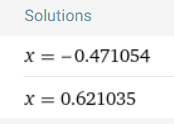

# 2. Решение системы нелинейных уравнений методом Ньютона

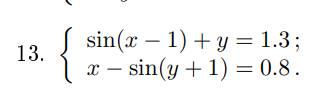

$
\begin{cases}
    \sin(x-1) + y = 1.3 \\
    x - \sin(y + 1) = 0.8
\end{cases}
$

$
\begin{cases}
    f_1(x, y) = \sin(x-1) + y - 1.3 = 0 \\
    f_2(x, y) = x - \sin(y + 1) - 0.8 = 0
\end{cases}
$

$
\frac{\partial f_1}{\partial x} = \cos(x-1) \\
\frac{\partial f_1}{\partial y} = 1 \\
\frac{\partial f_2}{\partial x} = 1 \\
\frac{\partial f_2}{\partial y} = \cos(y+1)
$

In [92]:
def f1(x, y):
    return sin(x - 1) + y - 1.3

def f2(x, y):
    return x - sin(y + 1) - 0.8

In [93]:
def df1x(x, y):
    return cos(x - 1)

def df1y(x, y):
    return 1

def df2x(x, y):
    return 1

def df2y(x, y):
    return cos(y + 1)

$
\begin{cases}
    f_1(x, y)^{'}_x g + f_1(x, y)^{'}_y h = -f_1(x, y) \\
    f_2(x, y)^{'}_x g + f_2(x, y)^{'}_y h = -f_2(x, y)
\end{cases}
$

$
k = f_1(x, y)^{'}_x f_2(x, y)^{'}_y - f_1(x, y)^{'}_y f_2(x, y)^{'}_x \\
g = \frac{1}{k}(-f_1(x, y)f_2(x, y)^{'}_y + f_2(x, y)f_1(x, y)^{'}_y) \\
h = \frac{1}{k}(-f_1(x, y)^{'}_x f_2(x, y) + f_1(x, y)f_2(x, y)^{'}_x)
$

In [106]:
def solve(f1, f2, df1x, df1y, df2x, df2y, x0, y0, eps=1e-6):
    while True:
        k = df1x(x0, y0)*df2y(x0, y0) - df1y(x0, y0)*df2x(x0, y0)
        g = 1/k * (-f1(x0, y0)*df2y(x0, y0) + f2(x0, y0)*df1y(x0, y0))
        h = 1/k * (-df1x(x0, y0)*f2(x0, y0) + f1(x0, y0)*df2x(x0, y0))
        root = (x0 + g, y0 + h)
        
        if ((root[0] - x0)**2 + (root[1] - y0)**2)**0.5 < eps:
            return root
        
        (x0, y0) = root

In [113]:
starts_x = [x for x in range(-100, 101, 20)]
starts_y = [y for y in range(-100, 101, 20)]

starts = [(x, y) for y in starts_y for x in starts_x]
eps = 1e-7

for s in starts:
    root = solve(f1, f2, df1x, df1y, df2x, df2y, *s)
    print(f'(x0, y0) = {s};\t\t(x, y) = {root}')

(x0, y0) = (-100, -100);		(x, y) = (1.799929231250693, 0.5826932159592243)
(x0, y0) = (-80, -100);		(x, y) = (1.7999292198833814, 0.5826932238792424)
(x0, y0) = (-60, -100);		(x, y) = (1.7999292286899597, 0.5826932177434151)
(x0, y0) = (-40, -100);		(x, y) = (1.7999292317116566, 0.5826932156380459)
(x0, y0) = (-20, -100);		(x, y) = (1.7999292319398474, 0.5826932154790528)
(x0, y0) = (0, -100);		(x, y) = (1.7999292236932865, 0.5826932212247954)
(x0, y0) = (20, -100);		(x, y) = (1.7999292268244753, 0.5826932190431804)
(x0, y0) = (40, -100);		(x, y) = (1.7999292323368778, 0.5826932152024196)
(x0, y0) = (60, -100);		(x, y) = (1.7999292257066226, 0.5826932198220331)
(x0, y0) = (80, -100);		(x, y) = (1.79992923262001, 0.5826932150051457)
(x0, y0) = (100, -100);		(x, y) = (1.7999292242735279, 0.5826932208205221)
(x0, y0) = (-100, -80);		(x, y) = (1.7999292311232489, 0.5826932160480212)
(x0, y0) = (-80, -80);		(x, y) = (1.7999292206023636, 0.5826932233783171)
(x0, y0) = (-60, -80);		(x, y) = (

In [109]:
root = solve(f1, f2, df1x, df1y, df2x, df2y, *starts[len(starts) // 2])
print('Решение системы уравнений:', root)

Решение системы уравнений: (1.7999292309174724, 0.5826932161913967)


### Изобразим решение на графике

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
def x_np(y):
    return 0.8 + np.sin(y + 1)

def y_np(x):
    return 1.3 - np.sin(x - 1)

In [64]:
X1 = np.linspace(-3, 5, 200)
Y1 = y_np(X1)

Y2 = np.linspace(-3, 5, 200)
X2 = x_np(Y2)

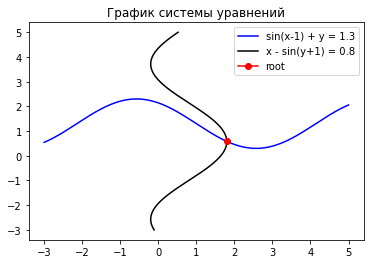

In [110]:
plt.plot(X1, Y1, label='sin(x-1) + y = 1.3', color='b')
plt.plot(X2, Y2, label='x - sin(y+1) = 0.8', color='k')
plt.plot(root[0], root[1], marker='o', label='root', color='r')
plt.title('График системы уравнений')
_ = plt.legend()